In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np

In [ ]:
officers = pd.read_csv('/content/drive/MyDrive/DataML/officers.csv')
poppol = pd.read_csv('/content/drive/MyDrive/DataML/d5.csv')
d10 = pd.read_csv('/content/drive/MyDrive/DataML/d10re_1.csv')

In [ ]:
# Districts 11, 1, 12 were the ones with the highest allegation rate and thus I will use these to see what factors are the most dominant in 

In [ ]:
officers.head()

,district,gender,race,major_award_count,allegation_count,sustained_count,unsustained_count,birth_year
0,9.0,M,White,0.0,0.0,0.0,0.0,1928.0
1,1.0,M,Black,0.0,0.0,0.0,0.0,1923.0
2,2.0,M,White,0.0,0.0,0.0,0.0,1938.0
3,17.0,M,White,0.0,0.0,0.0,0.0,1919.0
4,16.0,M,White,0.0,0.0,0.0,0.0,1923.0


In [ ]:
officers.shape

(17257, 8)

In [ ]:
poppol.head()

,district,black,white,hispanic,blackpop,whitepop,hispanicpop
0,1,0,1,0,0,1,0
1,2,1,0,0,1,0,0
2,3,1,0,0,1,0,0
3,4,0,1,0,1,0,0
4,5,1,0,0,1,0,0


In [ ]:
officersnew = pd.merge(officers, poppol, on=['district'])

In [ ]:
officersnew

,district,gender,race,major_award_count,allegation_count,sustained_count,unsustained_count,birth_year,black,white,hispanic,blackpop,whitepop,hispanicpop
0,9.0,M,White,0.0,0.0,0.0,0.0,1928.0,0,1,0,0,0,1
1,9.0,M,White,0.0,3.0,2.0,0.0,1954.0,0,1,0,0,0,1
2,9.0,M,White,0.0,1.0,0.0,0.0,1949.0,0,1,0,0,0,1
3,9.0,F,White,0.0,15.0,1.0,6.0,1957.0,0,1,0,0,0,1
4,9.0,M,White,0.0,31.0,1.0,22.0,1943.0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16499,22.0,M,White,0.0,5.0,2.0,1.0,1969.0,0,1,0,1,0,0
16500,22.0,M,White,0.0,0.0,0.0,0.0,1924.0,0,1,0,1,0,0
16501,22.0,M,White,0.0,18.0,0.0,12.0,1955.0,0,1,0,1,0,0
16502,22.0,M,White,0.0,1.0,0.0,0.0,1929.0,0,1,0,1,0,0


In [ ]:
officersnew.describe()

,district,major_award_count,allegation_count,sustained_count,unsustained_count,birth_year,black,white,hispanic,blackpop,whitepop,hispanicpop
count,16504.000000,16504.000000,16504.000000,16504.000000,16504.000000,16502.000000,16504.000000,16504.000000,16504.000000,16504.000000,16504.000000,16504.000000
mean,11.650509,0.119062,8.976309,0.827981,3.897964,1960.176827,0.242244,0.717402,0.040354,0.415233,0.327375,0.257392
std,7.166293,0.372593,11.709805,1.608818,6.385134,17.508362,0.428454,0.450276,0.196794,0.492777,0.469270,0.437210
min,1.000000,0.000000,0.000000,0.000000,0.000000,1917.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,6.000000,0.000000,1.000000,0.000000,0.000000,1947.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,11.000000,0.000000,5.000000,0.000000,1.000000,1962.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
75%,18.000000,0.000000,12.000000,1.000000,5.000000,1974.000000,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000
max,25.000000,5.000000,136.000000,28.000000,87.000000,1995.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
d10.head()

,district,district_population,allegation_count,allegationspercapita,police_per_district,black,white,hispanic,asianpacificislander,native,...,otherpop,blackpoppercent,whitepoppercent,hispanicpoppercent,asianpacificislanderpoppercent,nativeamericanpoppercent,otherpoppercent,allegations_per_officer,allegations_per_capita,allegations_per_capita_n
0,17,144096,3970,27,623,27,457,115,22,2,...,3645,3.318621,38.684627,43.187875,12.056546,0.222768,2.529564,6.372392,0.027551,0.058064
1,20,91279,3617,39,610,36,449,88,31,6,...,2416,10.855728,54.141697,18.097262,14.014176,0.244306,2.646830,5.929508,0.039626,6.431417
2,19,200786,8756,43,793,70,536,150,35,2,...,4320,6.626458,74.980825,9.973305,6.114470,0.153397,2.151544,11.041614,0.043609,8.533679
3,25,200391,8199,40,751,35,524,169,20,2,...,1682,16.484273,14.656846,66.372741,1.539989,0.106791,0.839359,10.917443,0.040915,7.111918
4,14,117738,6232,52,588,41,327,198,18,4,...,2070,6.817680,42.304948,45.897671,3.061034,0.160526,1.758141,10.598639,0.052931,13.454335


In [ ]:
d11 = d10[['district', 'allegations_per_officer']]

In [ ]:
d11

,district,allegations_per_officer
0,17,6.372392
1,20,5.929508
2,19,11.041614
3,25,10.917443
4,14,10.598639
5,7,12.727694
6,3,11.532450
7,4,12.307692
8,6,12.611457
9,22,8.753247


In [ ]:
officersnew2 = pd.merge(officersnew, d11, on=['district'])

In [ ]:
officersnew2

,district,gender,race,major_award_count,allegation_count,sustained_count,unsustained_count,birth_year,black,white,hispanic,blackpop,whitepop,hispanicpop,allegations_per_officer
0,9.0,M,White,0.0,0.0,0.0,0.0,1928.0,0,1,0,0,0,1,12.815172
1,9.0,M,White,0.0,3.0,2.0,0.0,1954.0,0,1,0,0,0,1,12.815172
2,9.0,M,White,0.0,1.0,0.0,0.0,1949.0,0,1,0,0,0,1,12.815172
3,9.0,F,White,0.0,15.0,1.0,6.0,1957.0,0,1,0,0,0,1,12.815172
4,9.0,M,White,0.0,31.0,1.0,22.0,1943.0,0,1,0,0,0,1,12.815172
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16499,22.0,M,White,0.0,5.0,2.0,1.0,1969.0,0,1,0,1,0,0,8.753247
16500,22.0,M,White,0.0,0.0,0.0,0.0,1924.0,0,1,0,1,0,0,8.753247
16501,22.0,M,White,0.0,18.0,0.0,12.0,1955.0,0,1,0,1,0,0,8.753247
16502,22.0,M,White,0.0,1.0,0.0,0.0,1929.0,0,1,0,1,0,0,8.753247


In [ ]:
officersnew2.isnull().sum()

district                   0
gender                     0
race                       0
major_award_count          0
allegation_count           0
sustained_count            0
unsustained_count          0
birth_year                 2
black                      0
white                      0
hispanic                   0
blackpop                   0
whitepop                   0
hispanicpop                0
allegations_per_officer    0
dtype: int64

In [ ]:
officersnew2.dropna()

,district,gender,race,major_award_count,allegation_count,sustained_count,unsustained_count,birth_year,black,white,hispanic,blackpop,whitepop,hispanicpop,allegations_per_officer
0,9.0,M,White,0.0,0.0,0.0,0.0,1928.0,0,1,0,0,0,1,12.815172
1,9.0,M,White,0.0,3.0,2.0,0.0,1954.0,0,1,0,0,0,1,12.815172
2,9.0,M,White,0.0,1.0,0.0,0.0,1949.0,0,1,0,0,0,1,12.815172
3,9.0,F,White,0.0,15.0,1.0,6.0,1957.0,0,1,0,0,0,1,12.815172
4,9.0,M,White,0.0,31.0,1.0,22.0,1943.0,0,1,0,0,0,1,12.815172
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16499,22.0,M,White,0.0,5.0,2.0,1.0,1969.0,0,1,0,1,0,0,8.753247
16500,22.0,M,White,0.0,0.0,0.0,0.0,1924.0,0,1,0,1,0,0,8.753247
16501,22.0,M,White,0.0,18.0,0.0,12.0,1955.0,0,1,0,1,0,0,8.753247
16502,22.0,M,White,0.0,1.0,0.0,0.0,1929.0,0,1,0,1,0,0,8.753247


In [ ]:
officersnew2.isnull().sum()

district                   0
gender                     0
race                       0
major_award_count          0
allegation_count           0
sustained_count            0
unsustained_count          0
birth_year                 2
black                      0
white                      0
hispanic                   0
blackpop                   0
whitepop                   0
hispanicpop                0
allegations_per_officer    0
dtype: int64

In [ ]:
officersnew2[officersnew2['birth_year'].isnull()]

,district,gender,race,major_award_count,allegation_count,sustained_count,unsustained_count,birth_year,black,white,hispanic,blackpop,whitepop,hispanicpop,allegations_per_officer
8007,25.0,M,White,0.0,0.0,0.0,0.0,NaN,0,1,0,0,0,1,10.917443
10364,3.0,F,Black,0.0,0.0,0.0,0.0,NaN,1,0,0,1,0,0,11.532450


In [ ]:
officersnew2 = officersnew2.dropna()

In [ ]:
officersnew2

,district,gender,race,major_award_count,allegation_count,sustained_count,unsustained_count,birth_year,black,white,hispanic,blackpop,whitepop,hispanicpop,allegations_per_officer
0,9.0,M,White,0.0,0.0,0.0,0.0,1928.0,0,1,0,0,0,1,12.815172
1,9.0,M,White,0.0,3.0,2.0,0.0,1954.0,0,1,0,0,0,1,12.815172
2,9.0,M,White,0.0,1.0,0.0,0.0,1949.0,0,1,0,0,0,1,12.815172
3,9.0,F,White,0.0,15.0,1.0,6.0,1957.0,0,1,0,0,0,1,12.815172
4,9.0,M,White,0.0,31.0,1.0,22.0,1943.0,0,1,0,0,0,1,12.815172
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16499,22.0,M,White,0.0,5.0,2.0,1.0,1969.0,0,1,0,1,0,0,8.753247
16500,22.0,M,White,0.0,0.0,0.0,0.0,1924.0,0,1,0,1,0,0,8.753247
16501,22.0,M,White,0.0,18.0,0.0,12.0,1955.0,0,1,0,1,0,0,8.753247
16502,22.0,M,White,0.0,1.0,0.0,0.0,1929.0,0,1,0,1,0,0,8.753247


In [ ]:
officersnew2.isnull().sum()

district                   0
gender                     0
race                       0
major_award_count          0
allegation_count           0
sustained_count            0
unsustained_count          0
birth_year                 0
black                      0
white                      0
hispanic                   0
blackpop                   0
whitepop                   0
hispanicpop                0
allegations_per_officer    0
dtype: int64

In [ ]:
officersnew2 = officersnew2[officersnew2['birth_year']>1955]

In [ ]:
officersnew2

,district,gender,race,major_award_count,allegation_count,sustained_count,unsustained_count,birth_year,black,white,hispanic,blackpop,whitepop,hispanicpop,allegations_per_officer
3,9.0,F,White,0.0,15.0,1.0,6.0,1957.0,0,1,0,0,0,1,12.815172
6,9.0,M,White,0.0,6.0,2.0,3.0,1958.0,0,1,0,0,0,1,12.815172
8,9.0,M,White,0.0,30.0,1.0,14.0,1961.0,0,1,0,0,0,1,12.815172
16,9.0,M,White,0.0,22.0,0.0,12.0,1957.0,0,1,0,0,0,1,12.815172
18,9.0,M,White,0.0,17.0,1.0,9.0,1962.0,0,1,0,0,0,1,12.815172
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16495,22.0,M,White,0.0,3.0,0.0,0.0,1979.0,0,1,0,1,0,0,8.753247
16496,22.0,M,White,0.0,16.0,0.0,6.0,1970.0,0,1,0,1,0,0,8.753247
16498,22.0,M,White,0.0,2.0,0.0,2.0,1972.0,0,1,0,1,0,0,8.753247
16499,22.0,M,White,0.0,5.0,2.0,1.0,1969.0,0,1,0,1,0,0,8.753247


In [ ]:
officersnew2.describe()

,district,major_award_count,allegation_count,sustained_count,unsustained_count,birth_year,black,white,hispanic,blackpop,whitepop,hispanicpop,allegations_per_officer
count,9943.000000,9943.000000,9943.000000,9943.000000,9943.000000,9943.000000,9943.000000,9943.000000,9943.000000,9943.000000,9943.000000,9943.000000,9943.000000
mean,11.723222,0.145731,11.150256,0.816051,4.494116,1972.149854,0.257769,0.696772,0.045459,0.436287,0.299909,0.263804,11.246927
std,7.100001,0.422396,12.739950,1.573281,6.865678,9.350055,0.437428,0.459676,0.208319,0.495949,0.458241,0.440716,2.448797
min,1.000000,0.000000,0.000000,0.000000,0.000000,1956.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.929508
25%,6.000000,0.000000,2.000000,0.000000,0.000000,1965.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,10.598639
50%,11.000000,0.000000,7.000000,0.000000,2.000000,1971.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,11.532450
75%,18.000000,0.000000,15.000000,1.000000,6.000000,1979.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,12.611457
max,25.000000,5.000000,132.000000,25.000000,76.000000,1995.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,16.761840


In [ ]:
banned = [13, 21, 23]
for i in range(1,26):
  if(i not in banned):
    dfnew = officersnew2[officersnew2.district == i]
    print(dfnew['allegation_count'].sum())
    print(len(dfnew))
    print(dfnew['allegation_count'].mean())
    print(dfnew['allegation_count'].std())
    print(i)
    print("")

5474.0
435
12.583908045977012
14.580594969648677
1

6045.0
519
11.647398843930636
11.758220158273248
2

4907.0
482
10.180497925311203
12.453096758572707
3

6351.0
454
13.98898678414097
16.291287839111387
4

5327.0
476
11.191176470588236
12.817553994521607
5

6251.0
516
12.114341085271318
15.479410306871625
6

5828.0
570
10.224561403508773
12.827862369496316
7

7390.0
497
14.869215291750503
15.666284104698232
8

5490.0
458
11.986899563318778
12.501371600667932
9

4535.0
452
10.033185840707965
11.493418748509061
10

4632.0
496
9.338709677419354
13.24173817317257
11

4616.0
453
10.189845474613687
10.795532639757479
12

3796.0
358
10.603351955307263
10.876396974268957
14

3365.0
438
7.6826484018264845
9.185463608949531
15

5032.0
414
12.154589371980677
11.060925955944612
16

3645.0
357
10.210084033613445
10.131334708242868
17

6105.0
480
12.71875
13.756989588063808
18

4945.0
485
10.195876288659793
10.762115194316507
19

3948.0
369
10.699186991869919
11.198021195061552
20

6018.0
387
15.55

In [ ]:
d12 = []
banned = [13, 21, 23]

for i in range(1,26):
  if(i not in banned):
    dfnew = officersnew2[officersnew2.district == i]
    d12.append(
        {
            'district': i,
            'mean': dfnew['allegation_count'].mean(),
            'std':  dfnew['allegation_count'].std()
        }
    )

In [ ]:

dfaddfin = pd.DataFrame(d12)

In [ ]:
dfaddfin

,district,mean,std
0,1,12.583908,14.580595
1,2,11.647399,11.758220
2,3,10.180498,12.453097
3,4,13.988987,16.291288
4,5,11.191176,12.817554
5,6,12.114341,15.479410
6,7,10.224561,12.827862
7,8,14.869215,15.666284
8,9,11.986900,12.501372
9,10,10.033186,11.493419


In [ ]:
officersnew3 = pd.merge(officersnew2, dfaddfin, on=['district'])

In [ ]:
officersnew3

,district,gender,race,major_award_count,allegation_count,sustained_count,unsustained_count,birth_year,black,white,hispanic,blackpop,whitepop,hispanicpop,allegations_per_officer,mean,std
0,9.0,F,White,0.0,15.0,1.0,6.0,1957.0,0,1,0,0,0,1,12.815172,11.986900,12.501372
1,9.0,M,White,0.0,6.0,2.0,3.0,1958.0,0,1,0,0,0,1,12.815172,11.986900,12.501372
2,9.0,M,White,0.0,30.0,1.0,14.0,1961.0,0,1,0,0,0,1,12.815172,11.986900,12.501372
3,9.0,M,White,0.0,22.0,0.0,12.0,1957.0,0,1,0,0,0,1,12.815172,11.986900,12.501372
4,9.0,M,White,0.0,17.0,1.0,9.0,1962.0,0,1,0,0,0,1,12.815172,11.986900,12.501372
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9938,22.0,M,White,0.0,3.0,0.0,0.0,1979.0,0,1,0,1,0,0,8.753247,15.550388,15.291449
9939,22.0,M,White,0.0,16.0,0.0,6.0,1970.0,0,1,0,1,0,0,8.753247,15.550388,15.291449
9940,22.0,M,White,0.0,2.0,0.0,2.0,1972.0,0,1,0,1,0,0,8.753247,15.550388,15.291449
9941,22.0,M,White,0.0,5.0,2.0,1.0,1969.0,0,1,0,1,0,0,8.753247,15.550388,15.291449


In [ ]:
officersnew3 = officersnew3[officersnew3['birth_year']<2000]

In [ ]:
officersnew3

,district,gender,race,major_award_count,allegation_count,sustained_count,unsustained_count,birth_year,black,white,hispanic,blackpop,whitepop,hispanicpop,allegations_per_officer,mean,std
0,9.0,F,White,0.0,15.0,1.0,6.0,1957.0,0,1,0,0,0,1,12.815172,11.986900,12.501372
1,9.0,M,White,0.0,6.0,2.0,3.0,1958.0,0,1,0,0,0,1,12.815172,11.986900,12.501372
2,9.0,M,White,0.0,30.0,1.0,14.0,1961.0,0,1,0,0,0,1,12.815172,11.986900,12.501372
3,9.0,M,White,0.0,22.0,0.0,12.0,1957.0,0,1,0,0,0,1,12.815172,11.986900,12.501372
4,9.0,M,White,0.0,17.0,1.0,9.0,1962.0,0,1,0,0,0,1,12.815172,11.986900,12.501372
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9938,22.0,M,White,0.0,3.0,0.0,0.0,1979.0,0,1,0,1,0,0,8.753247,15.550388,15.291449
9939,22.0,M,White,0.0,16.0,0.0,6.0,1970.0,0,1,0,1,0,0,8.753247,15.550388,15.291449
9940,22.0,M,White,0.0,2.0,0.0,2.0,1972.0,0,1,0,1,0,0,8.753247,15.550388,15.291449
9941,22.0,M,White,0.0,5.0,2.0,1.0,1969.0,0,1,0,1,0,0,8.753247,15.550388,15.291449


In [ ]:
officersnew3.isnull().sum()

district                   0
gender                     0
race                       0
major_award_count          0
allegation_count           0
sustained_count            0
unsustained_count          0
birth_year                 0
black                      0
white                      0
hispanic                   0
blackpop                   0
whitepop                   0
hispanicpop                0
allegations_per_officer    0
mean                       0
std                        0
dtype: int64

In [ ]:
conditions = [(officersnew3['allegation_count']>(officersnew3['mean']+(officersnew3['std']/2))),
              (officersnew3['allegation_count']>(officersnew3['mean']+(officersnew3['std']/4))) & (officersnew3['allegation_count']<=(officersnew3['mean']+(officersnew3['std']/2))),
              (officersnew3['allegation_count']>=(officersnew3['mean']-(officersnew3['std']/4))) & (officersnew3['allegation_count']<=(officersnew3['mean']+(officersnew3['std']/4))),
              (officersnew3['allegation_count']<(officersnew3['mean']-(officersnew3['std']/4))) & (officersnew3['allegation_count']>=(officersnew3['mean']-(officersnew3['std']/2))),
              (officersnew3['allegation_count']<(officersnew3['mean']-(officersnew3['std']/2)))]

In [ ]:
values = [5,4,3,2,1]

In [ ]:
officersnew3['y'] = np.select(conditions, values)

In [ ]:
officersnew3

,district,gender,race,major_award_count,allegation_count,sustained_count,unsustained_count,birth_year,black,white,hispanic,blackpop,whitepop,hispanicpop,allegations_per_officer,mean,std,y
0,9.0,F,White,0.0,15.0,1.0,6.0,1957.0,0,1,0,0,0,1,12.815172,11.986900,12.501372,3
1,9.0,M,White,0.0,6.0,2.0,3.0,1958.0,0,1,0,0,0,1,12.815172,11.986900,12.501372,2
2,9.0,M,White,0.0,30.0,1.0,14.0,1961.0,0,1,0,0,0,1,12.815172,11.986900,12.501372,5
3,9.0,M,White,0.0,22.0,0.0,12.0,1957.0,0,1,0,0,0,1,12.815172,11.986900,12.501372,5
4,9.0,M,White,0.0,17.0,1.0,9.0,1962.0,0,1,0,0,0,1,12.815172,11.986900,12.501372,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9938,22.0,M,White,0.0,3.0,0.0,0.0,1979.0,0,1,0,1,0,0,8.753247,15.550388,15.291449,1
9939,22.0,M,White,0.0,16.0,0.0,6.0,1970.0,0,1,0,1,0,0,8.753247,15.550388,15.291449,3
9940,22.0,M,White,0.0,2.0,0.0,2.0,1972.0,0,1,0,1,0,0,8.753247,15.550388,15.291449,1
9941,22.0,M,White,0.0,5.0,2.0,1.0,1969.0,0,1,0,1,0,0,8.753247,15.550388,15.291449,1


<AxesSubplot:ylabel='Frequency'>

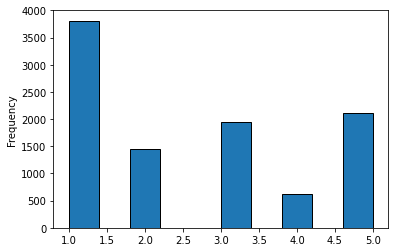

In [ ]:
officersnew3['y'].plot(kind='hist', edgecolor='black')

In [ ]:
conditions2 = [(officersnew3['allegation_count']>(officersnew3['mean']+(officersnew3['std']/3))),
              (officersnew3['allegation_count']>=(officersnew3['mean']-(officersnew3['std']/2))) & (officersnew3['allegation_count']<=(officersnew3['mean']+(officersnew3['std']/3))),
              (officersnew3['allegation_count']<(officersnew3['mean']-(officersnew3['std']/2)))]

In [ ]:
values2 = [3,2,1]

In [ ]:
officersnew3['y2'] = np.select(conditions2, values2)

In [ ]:
officersnew3

,district,gender,race,major_award_count,allegation_count,sustained_count,unsustained_count,birth_year,black,white,hispanic,blackpop,whitepop,hispanicpop,allegations_per_officer,mean,std,y,y2
0,9.0,F,White,0.0,15.0,1.0,6.0,1957.0,0,1,0,0,0,1,12.815172,11.986900,12.501372,3,2
1,9.0,M,White,0.0,6.0,2.0,3.0,1958.0,0,1,0,0,0,1,12.815172,11.986900,12.501372,2,2
2,9.0,M,White,0.0,30.0,1.0,14.0,1961.0,0,1,0,0,0,1,12.815172,11.986900,12.501372,5,3
3,9.0,M,White,0.0,22.0,0.0,12.0,1957.0,0,1,0,0,0,1,12.815172,11.986900,12.501372,5,3
4,9.0,M,White,0.0,17.0,1.0,9.0,1962.0,0,1,0,0,0,1,12.815172,11.986900,12.501372,4,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9938,22.0,M,White,0.0,3.0,0.0,0.0,1979.0,0,1,0,1,0,0,8.753247,15.550388,15.291449,1,1
9939,22.0,M,White,0.0,16.0,0.0,6.0,1970.0,0,1,0,1,0,0,8.753247,15.550388,15.291449,3,2
9940,22.0,M,White,0.0,2.0,0.0,2.0,1972.0,0,1,0,1,0,0,8.753247,15.550388,15.291449,1,1
9941,22.0,M,White,0.0,5.0,2.0,1.0,1969.0,0,1,0,1,0,0,8.753247,15.550388,15.291449,1,1


<AxesSubplot:ylabel='Frequency'>

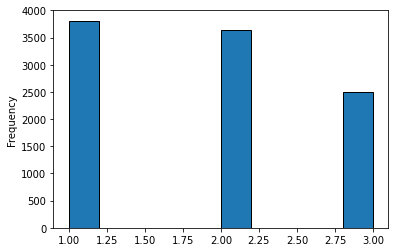

In [ ]:
officersnew3['y2'].plot(kind='hist', edgecolor='black')

In [ ]:
conditions3 = [(officersnew3['allegation_count']>=(officersnew3['mean'])),
               (officersnew3['allegation_count']<(officersnew3['mean']))]

In [ ]:
values = [2,1]

In [ ]:
officersnew3['y3'] = np.select(conditions3, values)

<AxesSubplot:ylabel='Frequency'>

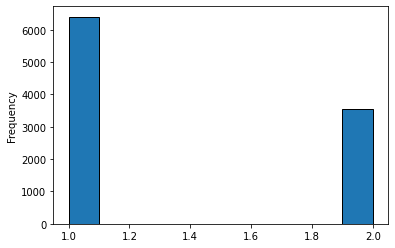

In [ ]:
officersnew3['y3'].plot(kind='hist', edgecolor='black')

In [ ]:
officersnew3

,district,gender,race,major_award_count,allegation_count,sustained_count,unsustained_count,birth_year,black,white,hispanic,blackpop,whitepop,hispanicpop,allegations_per_officer,mean,std,y,y2,y3
0,9.0,F,White,0.0,15.0,1.0,6.0,1957.0,0,1,0,0,0,1,12.815172,11.986900,12.501372,3,2,2
1,9.0,M,White,0.0,6.0,2.0,3.0,1958.0,0,1,0,0,0,1,12.815172,11.986900,12.501372,2,2,1
2,9.0,M,White,0.0,30.0,1.0,14.0,1961.0,0,1,0,0,0,1,12.815172,11.986900,12.501372,5,3,2
3,9.0,M,White,0.0,22.0,0.0,12.0,1957.0,0,1,0,0,0,1,12.815172,11.986900,12.501372,5,3,2
4,9.0,M,White,0.0,17.0,1.0,9.0,1962.0,0,1,0,0,0,1,12.815172,11.986900,12.501372,4,3,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9938,22.0,M,White,0.0,3.0,0.0,0.0,1979.0,0,1,0,1,0,0,8.753247,15.550388,15.291449,1,1,1
9939,22.0,M,White,0.0,16.0,0.0,6.0,1970.0,0,1,0,1,0,0,8.753247,15.550388,15.291449,3,2,2
9940,22.0,M,White,0.0,2.0,0.0,2.0,1972.0,0,1,0,1,0,0,8.753247,15.550388,15.291449,1,1,1
9941,22.0,M,White,0.0,5.0,2.0,1.0,1969.0,0,1,0,1,0,0,8.753247,15.550388,15.291449,1,1,1


In [ ]:
from google.colab import files
officersnew3.to_csv('output.csv', encoding = 'utf-8-sig', index=False) 
files.download('output.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>